In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten,Dense,Input
from keras.models import Model
from keras import regularizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv("mnist_784_csv.csv")
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [9]:
x = df.drop('class',axis = 1)
y = df['class']

In [5]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) #rememner this 

In [11]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [13]:
x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(len(x_test),784)

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu',activity_regularizer = regularizers.l1(10e-5))(input_img)

In [17]:
decoded = Dense(784,activation='sigmoid')(encoded)

In [19]:
autoencoder = Model(input_img,decoded)

In [20]:
autoencoder.compile(optimizer = 'Adam',loss='binary_crossentropy',metrics=["acc"])

In [21]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
autoencoder.fit(x_train,x_train,epochs=10,batch_size=100,validation_data=(x_test,x_test))

Epoch 1/10
560/560 [==============================] - 3s 5ms/step - loss: 0.2254 - acc: 0.0100 - val_loss: 0.1628 - val_acc: 0.0112
Epoch 2/10
560/560 [==============================] - 2s 4ms/step - loss: 0.1463 - acc: 0.0095 - val_loss: 0.1336 - val_acc: 0.0104
Epoch 3/10
560/560 [==============================] - 2s 4ms/step - loss: 0.1267 - acc: 0.0110 - val_loss: 0.1208 - val_acc: 0.0140
Epoch 4/10
560/560 [==============================] - 3s 5ms/step - loss: 0.1171 - acc: 0.0128 - val_loss: 0.1135 - val_acc: 0.0149
Epoch 5/10
560/560 [==============================] - 2s 4ms/step - loss: 0.1112 - acc: 0.0140 - val_loss: 0.1091 - val_acc: 0.0155
Epoch 6/10
560/560 [==============================] - 2s 4ms/step - loss: 0.1081 - acc: 0.0140 - val_loss: 0.1070 - val_acc: 0.0164
Epoch 7/10
560/560 [==============================] - 2s 4ms/step - loss: 0.1064 - acc: 0.0144 - val_loss: 0.1057 - val_acc: 0.0155
Epoch 8/10
560/560 [==============================] - 2s 4ms/step - loss: 0.

In [23]:
output_img=autoencoder.predict(x_test)

438/438 [==============================] - 1s 2ms/step


In [25]:
score = autoencoder.evaluate(x_test)
print("Accuracy:- ",score[1])

438/438 [==============================] - 1s 2ms/step - loss: 0.0083 - acc: 0.0000e+00
Accuracy:-  0.0


In [26]:
x_test = pd.DataFrame(x_test)

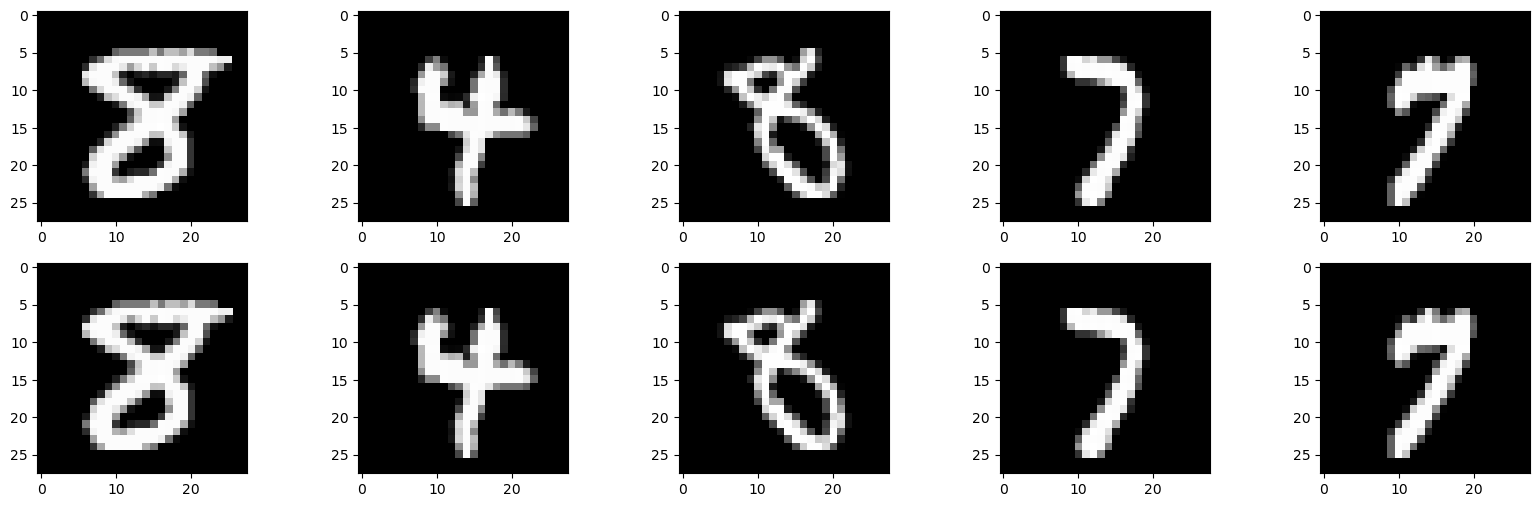

In [30]:
n=5
plt.figure(figsize=(20,6))

for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(x_test.iloc[i].values.reshape(28,28),cmap = 'gray')
    
    plt.subplot(2,n,i+1+n)
    plt.imshow(x_test.iloc[i].values.reshape(28,28),cmap = 'gray')
    
plt.show()
    